In [2]:
import numpy as np
import matplotlib.pyplot as plt

import dataset_generation as dg

import ManifoldSculpting as ms

from sklearn.metrics import mean_squared_error
from sklearn.manifold import Isomap, LocallyLinearEmbedding

In [6]:
data_folder = '../data/'
neighbors = np.linspace(20, 80, 4).astype(int)
n_comps: int = 2

In [3]:
# dataset = dg.swissRoll(2000)
# X = dataset.swissRoll3D()
# X_2D = dataset.swissRoll2D()


# np.savetxt(data_folder + "swissRoll3D.csv", X, delimiter=",")
# np.savetxt(data_folder + "swissRoll2D.csv", X_2D, delimiter=",")

X = np.loadtxt(data_folder + "swissRoll3D.csv", delimiter=",")
X_2D = np.loadtxt(data_folder + "swissRoll2D.csv", delimiter=",")

In [5]:
mse_isomap = []
mse_LLE = []

for n in neighbors:
    X_trans_isomap = Isomap(n_neighbors=n, n_components=n_comps).fit_transform(X)

    np.savetxt(data_folder + f"swissRoll_isomap_{n}.csv", X_trans_isomap, delimiter=",")
               

    X_trans_LLE = LocallyLinearEmbedding(n_neighbors=n, n_components=n_comps).fit_transform(X)

    np.savetxt(data_folder + f"swissRoll_LLE_{n}.csv", X_trans_LLE, delimiter=",")
    
    mse_isomap.append(mean_squared_error(X_trans_isomap, X_2D))
    mse_LLE.append(mean_squared_error(X_trans_LLE, X_2D))
    print(f"n_neighbors = {n} done")

np.savetxt(data_folder + f"swissRoll_isomap_mse.csv", np.array(mse_isomap), delimiter=",")
np.savetxt(data_folder + f"swissRoll_LLE_mse.csv", np.array(mse_LLE), delimiter=",")


# mse_isomap = np.loadtxt(data_folder + "swissRoll_isomap_mse.csv", delimiter=",")
# mse_LLE = np.loadtxt(data_folder + "swissRoll_LLE_mse.csv", delimiter=",")


FileNotFoundError: ../data/swissRoll_isomap_mse.csv not found.

In [ ]:
mse_isomap
mse_LLE
mse_ms

[np.float64(330.9968278963727),
 np.float64(322.26744111370743),
 np.float64(336.6226304741972)]

([<matplotlib.axis.XTick at 0x12bd8f3d0>,
 [Text(20, 0, '20'), Text(40, 0, '40'), Text(60, 0, '60')])

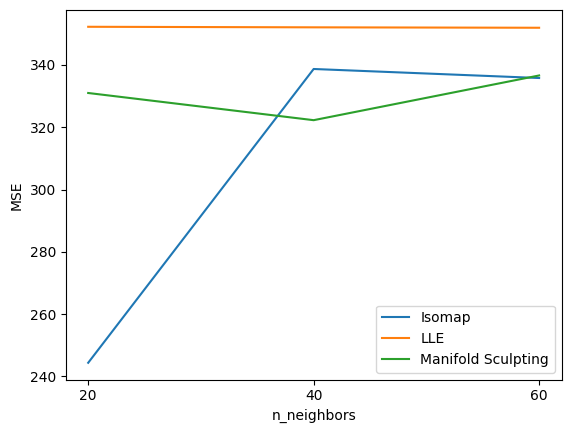

In [ ]:
plt.plot(neighbors[:len(mse_isomap)], mse_isomap, label='Isomap')
plt.plot(neighbors[:len(mse_LLE)], mse_LLE, label='LLE')
plt.plot(neighbors[:len(mse_ms)], mse_ms, label='Manifold Sculpting')
plt.xlabel('n_neighbors')
plt.ylabel('MSE')
plt.legend()
plt.xticks(neighbors[:len(mse_LLE)])

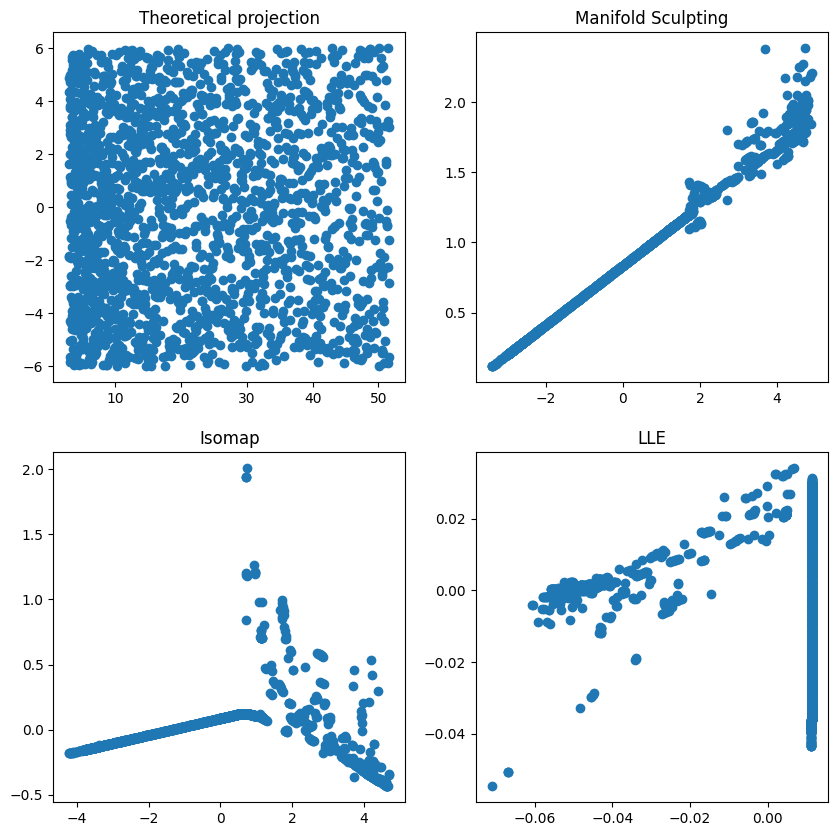

In [ ]:
fog, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].scatter(X_2D[:, 0], X_2D[:, 1])
axs[0, 0].set_title("Theoretical projection")

axs[0, 1].scatter(X_trans_MS[:, 0], X_trans_MS[:, 1])
axs[0, 1].set_title("Manifold Sculpting")

axs[1, 0].scatter(X_trans_isomap[:, 0], X_trans_isomap[:, 1])
axs[1, 0].set_title("Isomap")

axs[1, 1].scatter(X_trans_LLE[:, 0], X_trans_LLE[:, 1])
axs[1, 1].set_title("LLE")
plt.show()